# Хiд виконання роботи
1. Завантажити початковi данi.
2. Представити данi графiчно.
3. Iнiцiалiзувати параметри: швидкiсть навчання, кiлькiсть епох (=100) i додатково, якщо задано згiдно з варiантом, кiлькiсть пакетiв i/або параметр регуляризацiї.
4. Iнiцiалiзувати вектор параметрiв.
5. Реалiзувати функцiю, яка задає модель, наприклад:
    * полiномiальну регресiю,
6. Задати функцiю втрат (одну згiдно з варiантом):
    * MSE з регуляризацiєю за нормою L2.
7. Задати операцiю, яка буде викликатися на кожнiй iтерацiї алгоритма навчання:
    * алгоритм мiнi-пакетного градiєнтного спуску.
8. Виконати навчання моделi.
9. Виводити значення функцiї втрат через кожнi 10 епох.
10. Зберегти контрольнi точки через регулярнi iнтервали пiд час навчання, наприклад, використовуючи Sаver. В кiнцi навчання зберегти результуючу модель. Вiдновити останню контрольну точку при запуску, якщо навчання було перервано.
11. Налаштувати гiперпараметр швидкостi навчання i додатково, якщо задано згiдно варiанту, розмiр мiнi-пакета. Подивитися на форму кривої навчання.
12. Дослiдити рiзнi значення параметра регуляризацiї i пiдiбрати найкраще з них, якщо згiдно з варiантом задано регуляризовану функцiю втрат. В цьому випадку данi мають бути попередньо розбитi на навчальний та перевiрочний набори.
13. Побудувати графiк з початковими даними та лiнiєю регресiї.

## Завдання згідно з варіантом 29:
Полiномiальна регресiя, алгоритм градiєнтного спуску за мiнi-батчами, MSE з регуляризацiєю за нормою L2. Дослiдити рiзнi значення параметра регуляризацiї i пiдiбрати найкраще з них.
Початковi данi:

(а) 
```python 
X_data = np.linspace(-1, 1, 100)
num_coef = 5
coef = [10, 2, 30, 4, 5]
y_data = 0
for i in range( num_coef ):
    y_data += coef[i] ∗ np.power(X_data, i )
    y_data += np.random.randn(∗ X_data.shape ) ∗ 1.5
```
(б) sklearn.datasets.fetch_california_housing

In [13]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import tensorflow.compat.v1 as tf
tf.get_logger().setLevel('ERROR')
tf.disable_v2_behavior()

## Data

### (a)

In [3]:
X_data = np.linspace(-1, 1, 100)
num_coef = 5
coef = [10, 2, 30, 4, 5]
y_data = 0
for i in range( num_coef ):
    y_data += coef[i] * np.power(X_data, i )
    y_data += np.random.randn(* X_data.shape ) * 1.5

In [4]:
print(f"X shape: {X_data.shape}, y shape: {y_data.shape}")

X shape: (100,), y shape: (100,)


Перший набір даних складається з однієї ознаки.

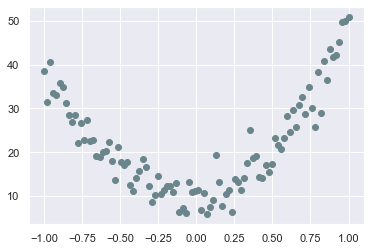

In [237]:
plt.scatter(X_data, y_data, color="#6A858B")

С графіку бачимо, що крива, на яку лягають дані, є параболою, тож завчасно можна сказати, що поліноміальна регресія досить гарно спрацює на цих даних.

__________

### (б)

In [6]:
data= datasets.fetch_california_housing(as_frame=True).frame

In [7]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Другий набір даних містить 8 числових ознак. Таргет - MedHouseVal, середня вартість будинку.

In [8]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


З отриманих характеристик среднього значення та середньоквадратичного відхилення можна сказати, що дані далекі від нормального розподілу, отже, для коректної роботи градієнтного спуску, їх необхідно нормалізувати.

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

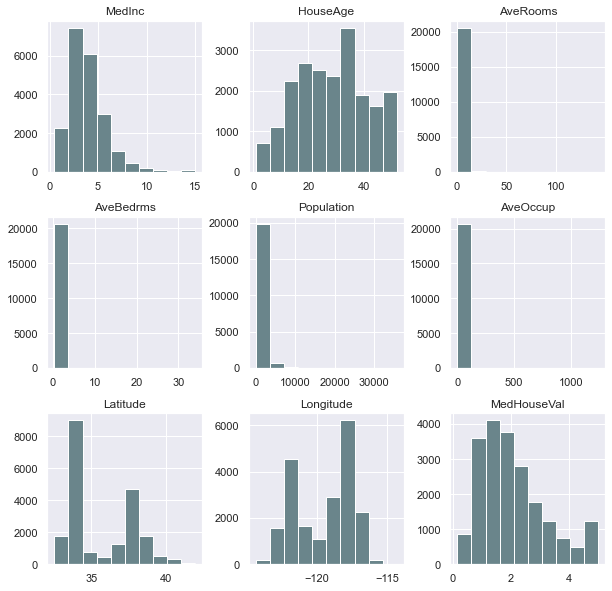

In [236]:
data.hist(figsize=(10, 10), color="#6A858B")

З гістограм бачимо, що ознаки MedInc, HouseAge, Latitude, Longitude мають певний розподіл на своєму інтервалі, у той час, як AveRooms, AveBedrms, Population, AveOccup зосереджені у певному проміжку, та скоріш за все містять викиди. Наприклад, для AveOccup значення 75% спостережень менші за 3.28, у той час як максимальне значення дорівнює 1243.3. 

In [10]:
data.loc[data["AveOccup"] > 15]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1039,4.3029,16.0,6.090592,1.121951,4930.0,17.177700,38.42,-120.97,1.21900
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.67500
4479,3.5769,41.0,4.940000,1.100000,925.0,18.500000,34.07,-118.16,1.35700
5986,1.8750,52.0,4.500000,1.206349,2688.0,21.333333,34.10,-117.71,2.12500
7164,2.1845,36.0,4.812155,1.110497,2862.0,15.812155,34.06,-118.17,1.23800
8874,9.3370,52.0,7.285714,1.214286,1154.0,41.214286,34.06,-118.45,5.00001
9172,4.2391,5.0,5.123810,0.933333,8733.0,83.171429,34.47,-118.59,1.54600
12104,1.6250,8.0,7.600000,0.950000,1275.0,63.750000,33.97,-117.33,1.62500
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.25000
13366,4.2578,36.0,5.258824,1.117647,2886.0,33.952941,33.94,-117.63,1.83300


На наступних графіках зображено розподіл цільової змінної відносно ознак. Можна зробити наступні висновки:
* Чим більше значення MedInc, тобто середній дохід у групі, тим, відповідно, більша вартість дому.
* У проміжку довготи від 35 до 37 та від 39 і більше, проміжку широти від -124 до -123 та -121 до -119 будинки переважно дешевші.

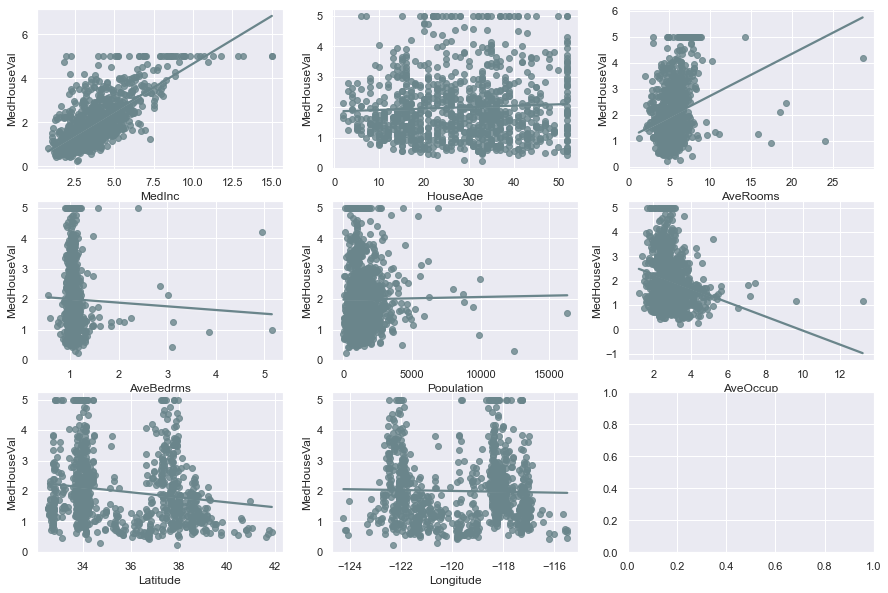

In [16]:
import seaborn as sns
numeric_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']

random_sample = data.sample(1000)
fig,ax = plt.subplots(3,3,figsize=(15,10))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.regplot(x=i,y="MedHouseVal",data=random_sample,ax=ax[row,col],ci=False, color="#6A858B")
    col += 1

Коробковий графік будується наступним чином:
* нижня та верхня сторони ящика завжди - це перший і третій квартилі, а смужка всередині коробки - медіана
* кінці вусів: найнижче значення даних, який знаходиться ще в межах 1,5 IQR (міжквартильного інтервалу) нижнього квартиля, а найвище значення в межах 1,5 IQR верхнього квартиля 
* будь-які дані, що не включено між вусами вважаються викидами, їх наносять ізольованими точками

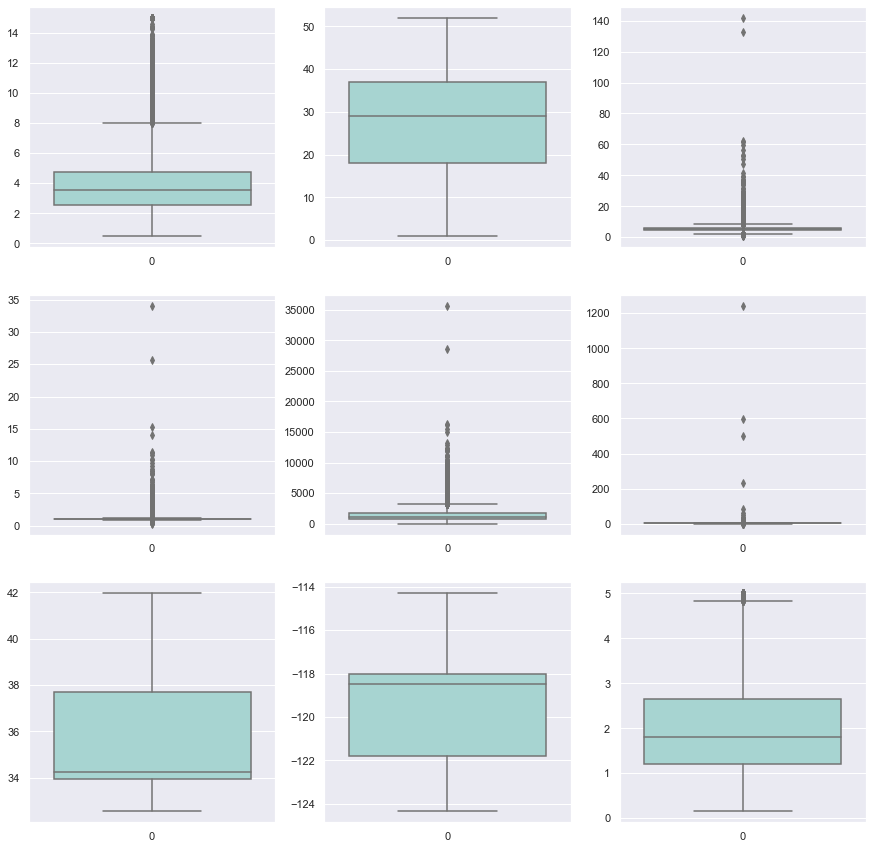

In [17]:

fig,ax = plt.subplots(3,3,figsize=(15,15))
row = col = 0
for n,i in enumerate(data.columns):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.boxplot(data=data[i], ax=ax[row, col], color="#A0DBD7")
    col += 1

На графіках "ящик з вусами" знову спостерігаємо, що ознаки  AveRooms, AveBedrms, Population, AveOccup містять значі викиди. Загалом, для кращої роботи алгоритмів такі спостереження слід вилучати. Але це складний процес, адже викиди можуть бути спричинені не тільки помилками у вимірюванні, а й природною данних, і зазвичай він потребує попередньої оцінки розподілу даних.

In [19]:
X_b = data.drop(["MedHouseVal"], axis=1).to_numpy()
y_b = data["MedHouseVal"].to_numpy()

### Feature Importance

In [20]:
from sklearn.feature_selection import f_regression

f_scores, p_scores = f_regression(X_b, y_b)
for f, s in zip(data.columns, p_scores):
    print(f"{f} p-score: {s}.")
print()
for f, s in zip(data.columns, f_scores):
    print(f"{f} F-score: {s}.")

MedInc p-score: 0.0.
HouseAge p-score: 2.761860676076926e-52.
AveRooms p-score: 7.569242134381813e-107.
AveBedrms p-score: 1.91258938715413e-11.
Population p-score: 0.0003976307847792519.
AveOccup p-score: 0.0006483442369874788.
Latitude p-score: 2.9398592894286614e-96.
Longitude p-score: 3.9233220693570194e-11.

MedInc F-score: 18556.571631293402.
HouseAge F-score: 232.84147870961573.
AveRooms F-score: 487.7574616966914.
AveBedrms F-score: 45.10857562258576.
Population F-score: 12.547410331742418.
AveOccup F-score: 11.635342108126979.
Latitude F-score: 438.0054534277026.
Longitude F-score: 43.698976125705215.


Бачимо, що найбільший вплив має середній дохід, найменший - середня кількість жителів в будинку. Але усі значення p-value менші за 0.05, то усі ознаки є важливими на рівні значимості 0.05 (навіть з великим запасом)

________

Розіб'ємо дані на тренувальний, перевірочний та тестовий набори. Нормалізуємо другий датасет.

In [21]:
from sklearn.model_selection import train_test_split

def train_valid_test_split(X, y, train_size, valid_size):
    X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=train_size, random_state=0)
    
    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, train_size=valid_size, random_state=0)
    
    return X_train, y_train, X_valid, X_test, y_valid, y_test

In [22]:
X_train_a, y_train_a, X_valid_a, X_test_a, y_valid_a, y_test_a = train_valid_test_split(X_data, y_data, 0.75, 0.5)

In [23]:
X_train_b, y_train_b, X_valid_b, X_test_b, y_valid_b, y_test_b = train_valid_test_split(X_b, y_b, 0.75, 0.5)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_b = scaler.fit_transform(X_train_b)
X_test_b = scaler.fit_transform(X_test_b)
X_valid_b = scaler.fit_transform(X_valid_b)

___________

## Algorithm

### Mini-batch Gradient Descent

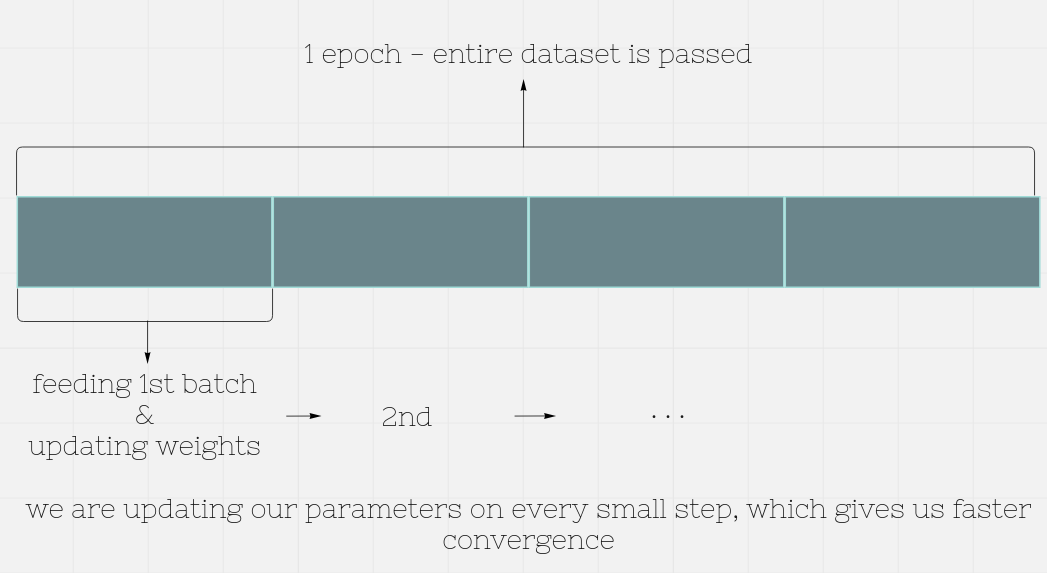

### Polynomial Regression
Для однієї ознаки рівняння виглядає наступним чином:

Поліноміальну регресію можна вважати частковим випадком множинної лінійної регресії, оскільки кожний доданок $x^i$ ми ніби вважаємо за окрему ознаку, але, завдяки цьому перетворенню, вона здатна узагальнювати нелінійні залежності. 

Для двух ознак і більше рівняння буде ще й містити добутки змінних між собою.
Бібліотека sklearn містить функцію PolynomialFeatures яка перетворює вхідний масив на поліном будь-якого порядку, і одразу включає до трансформованого масиву bias

In [25]:
# повертає і-ий батч розміром batch_size
def get_minibatch(X, y, i, batch_size):
    idx_from = (i - 1) * batch_size
    idx_to = min(i * batch_size, X.shape[0])
    return X[idx_from : idx_to], y[idx_from : idx_to]

# повертає функцію втрат з регуляризіцією за нормою L2
def mse_loss(y_pred, y_real, c=0, weights=None):
    error = y_pred - y_real
    mse = tf.reduce_mean(tf.square(error), name="mse")
    if c != 0 and weights is not None:
        mse += c * tf.reduce_sum(tf.pow(weights, 2))
    return mse

In [26]:
from sklearn.preprocessing import PolynomialFeatures
import os

# власне, клас поліноміальної регресії
class MyPolinomialRegression:
    
    counter = 0
    
    def __init__(self, path=None, degree=2, learning_rate=0.01, c=0.0, batch_size=512, n_epoch=100, verbose=False):
        
        """
        path - шлях до контрольної точки, якщо необхідно відновити модель
        degree - степінь поліному
        learning_rate - коефіцієнт навчання
        c - коефіцієнт регуляризації
        batch_size - розмір батча для алгоритму мiнi-пакетного градiєнтного спуску
        n_epoch - кількість епох
        verbose - визначає, чи виводити додаткову інформацію про процес навчання
        """
        
        MyPolinomialRegression.counter += 1
        self.name = "Model_" + str(self.counter)

        # якщо задано шлях, намагаємося відновити модель
        if path:
            self.path = path
            self.graph = self._restore_model(path)
        # в іншому випадку, cтворюємо граф моделі з нуля   
        else:
            self.graph = tf.Graph()
            
            with self.graph.as_default():
                self.degree = tf.constant(degree, name="degree")
                self.polynom = PolynomialFeatures(degree=degree)
                
                self.learning_rate = tf.constant(learning_rate, name="learning_rate")
                self.batch_size = tf.constant(batch_size, name="batch_size")
                self.c = tf.constant(c, 'float64', name="c")
                self.n_epoch = tf.constant(n_epoch, name="n_epoch")
                
                # поки не викликан метод fit, встановлюємо ваги як None
                self.weights = None
                
                self.verbose = tf.constant(verbose, name="verbose")
                
                self.saver = None
                self.path = None
                
    # метод, що викликається для ініалізації "технічних" змінних при першому навчанні інстансу
    def _init_model(self, m):
        with self.graph.as_default():
            # генеруємо з рівномірного розподілу випадкові ваги
            self.weights = tf.Variable(tf.random_uniform([m, 1], -1.0, 1.0, 'float64'), name="weights")
            
            # створюємо вузли-заповнювачі для того, щоб мати можливість навчати дані на наборах з різною кількістю
            # прикладів та різною кількістю ознак
            X = tf.placeholder(tf.float64, shape=(None, None), name="X")
            y_real = tf.placeholder(tf.float64, shape=(None, 1), name="y_real")
            
            y_pred = self._predict()
            
            # функція втрат
            mse = mse_loss(y_pred, y_real, c=self.c, weights=self.weights)

            # задаємо оптимізатор, в даному випадку це градієнтний спуск, та вказуємо, ще необхідно мінімізувати
            # функцію втрат
            optimizer = tf.train.GradientDescentOptimizer(learning_rate=self.learning_rate)
            training_op = optimizer.minimize(mse, name="training_op")
        
    # метод, що відповідає за відновлення моделі за контрольною точкою    
    def _restore_model(self, path):
        model_graph = tf.Graph()

        # відновлюємо граф
        with model_graph.as_default():
            self.saver = tf.train.import_meta_graph(f"{path}.meta")

        # відновлюємо сесію
        with tf.Session(graph=model_graph) as sess:

            self.saver.restore(sess, path)

            self.degree = model_graph.get_tensor_by_name("degree:0")
            self.polynom = PolynomialFeatures(degree=self.degree.eval())

            self.learning_rate = model_graph.get_tensor_by_name("learning_rate:0")
            self.batch_size = model_graph.get_tensor_by_name("batch_size:0")
            self.c = model_graph.get_tensor_by_name("c:0")
            self.n_epoch = model_graph.get_tensor_by_name("n_epoch:0")

            self.weights = tf.Variable(sess.run("weights:0"), name="weights")

            self.verbose = model_graph.get_tensor_by_name("verbose:0")

        return model_graph
        
    def _predict(self):
        return self.graph.get_tensor_by_name("X:0") @ self.weights
        
    # метод для навчання моделі
    def fit(self, X_input, y_input):
        
        if X_input.ndim == 1:
            X_input = X_input.reshape(-1 , 1)
            
        if y_input.ndim == 1:
            y_input = y_input.reshape(-1 , 1)
            
        X_transform = self.polynom.fit_transform(X_input)
        
        # визначаємо, скільки вагів буде мати наша модель
        m = X_transform.shape[1]
        
        # якщо це перше навчання, то необхідно ініціалізувати деякі параметри
        if self.weights is None:
            self._init_model(m)

            
        with tf.Session(graph=self.graph) as sess:
            sess.run(tf.global_variables_initializer())
            # екземпляр класу Saver, який буде зберігати контрольні точки
            if self.saver and self.path:
                self.saver.restore(sess, self.path)
            else:
                self.saver = tf.train.Saver()
            
            
            for i in range(self.n_epoch.eval()):
                if i % 10 == 0:
                    # виводимо значення функцiї втрат і робимо контрольну точку через кожнi 10 епох
                    if self.verbose.eval():
                        print(f"\tMSE: {sess.run('mse:0', feed_dict={'X:0': X_transform, 'y_real:0': y_input})}")
                    self.path = self.saver.save(sess, f"{os.getcwd()}/tmp/{self.name}.ckpt")
                # ітерація міні-пакетного градієнтного спуску
                for batch_index in range(1, int(np.ceil(X_transform.shape[0] / self.batch_size.eval())) + 1):
                    x_batch, y_batch = get_minibatch(X_transform, y_input, batch_index, self.batch_size.eval())
                    sess.run("training_op", feed_dict={"X:0": x_batch, "y_real:0": y_batch})
                    
            # фіксуємо фінальні ваги
            weights = sess.run("weights:0")
            self.weights = tf.Variable(weights, name="weights")
            
            # фінальна контрольна точка
            self.path = self.saver.save(sess, f"{os.getcwd()}/tmp/{self.name}.ckpt")
            
            if self.verbose.eval():
                print(f"Last checkpoint: {self.path}")
                print("Final weights:\n", weights)
    
    def predict(self, X_input):
        # якщо не було жодного навчання, то виводиться виключення
        if self.weights is None:
            raise Exception("This MyPolinomialRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator")
        
        if X_input.ndim == 1:
            X_input = X_input.reshape(-1 , 1)
        
        # перетворюємо вхідний масив
        X_transform = self.polynom.fit_transform(X_input)
            
        # знаходимо прогноз
        with tf.Session(graph=self.graph) as sess:
            _ = sess.run(tf.global_variables_initializer())
            if self.saver and self.path:
                self.saver.restore(sess, self.path)
                
            prediction = (self._predict()).eval(feed_dict={"X:0" : X_transform})
            
        return prediction
    
    def get_param(self, attr):
        with tf.Session(graph=self.graph) as sess:
            _ = sess.run(tf.global_variables_initializer())
            if self.saver and self.path:
                self.saver.restore(sess, self.path)
            try:
                return sess.run(f"{attr}:0")
            except Exception as e:
                raise Exception(f"Cannot fetch {attr}")
    
        

Cтворимо одну модель з параметрами за замовчуванням та спробуємо її відновити

In [27]:
model = MyPolinomialRegression(verbose=True)
model.fit(X_train_a, y_train_a)

	MSE: 616.3141761941054
	MSE: 418.573455020649
	MSE: 291.9358340283959
	MSE: 210.56588471700272
	MSE: 158.02839043049
	MSE: 123.86715611595307
	MSE: 101.42904719078452
	MSE: 86.48001394299689
	MSE: 76.32483264852377
	MSE: 69.24722052330185
Last checkpoint: /home/daria/Desktop/stu(dying)/uni/6s/NN/lab2/tmp/Model_1.ckpt
Final weights:
 [[16.17056755]
 [ 3.23306028]
 [10.1468411 ]]


In [28]:
model_rest = MyPolinomialRegression(path="/home/daria/Desktop/stu(dying)/uni/6s/NN/lab2/tmp/Model_1.ckpt")

In [29]:
model_rest.predict(X_test_a)

array([[26.84782379],
       [22.41159489],
       [20.59210944],
       [17.50616403],
       [26.42637096],
       [22.08764159],
       [17.19783133],
       [15.96051117],
       [19.48907044],
       [20.87465129],
       [24.07158202],
       [16.4498968 ],
       [19.30363454]])

In [30]:
model_rest.fit(X_valid_a, y_valid_a)

	MSE: 35.97541718942947
	MSE: 35.11369900084384
	MSE: 34.29803123319153
	MSE: 33.52437945013515
	MSE: 32.789238021378424
	MSE: 32.089518965868926
	MSE: 31.42247330784146
	MSE: 30.785634130754904
	MSE: 30.176774246434928
	MSE: 29.593873828722497
Last checkpoint: /home/daria/Desktop/stu(dying)/uni/6s/NN/lab2/tmp/Model_2.ckpt
Final weights:
 [[15.38994889]
 [ 4.43816057]
 [12.34482551]]


__________

### R squared

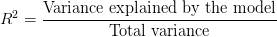

0% - модель зовсім не пояснює варіативність даних.
100% - модель гарно узагальнює дані.

### Mean Squared Error
$$
\frac{1}{n} \sum_i^n (y_i - \hat{y}_i)^2
$$
### Mean Absolute Error
$$
\frac{1}{n} \sum_1^n |y_i - \hat{y}_i|
$$
Більш стійка відносно викидів
### Mean Absolute Percentage Error
$$
\frac{1}{n} \sum_i^n \frac{y_i - \hat{y}_i}{y_i}
$$
Можуть виникнути проблеми, якщо y-ки близькі до нуля.
      
            
Хочемо, щоб коефіцієнт детермінації прямував до 1, інші метрики - до нуля

In [219]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve


def scoring(y_real, y_pred, return_score, verbose=False):
    try:
        scores = {"r2": r2_score(y_real, y_pred),
                  "mse": mean_squared_error(y_real, y_pred),
                  "mae": mean_absolute_error(y_real, y_pred),
                  "mape": mean_absolute_percentage_error(y_real, y_pred)}
    
        if verbose:
            print(f"R2 score: {scores['r2']:.3}")
            print(f"MSE score: {scores['mse']:.3}")
            print(f"MAE score: {scores['mae']:.3}")
            print(f"MAPE score: {scores['mape']:.3}")

        return scores[return_score]

    except Exception as e:
        print(e)
        return 

def plot_learning_curve(cls, cls_params, X, y, X_test, y_test, score, 
                        title="Learning Curve", cv=None, train_sizes=np.linspace(0.1, 0.99, 10)):

    _, axes = plt.subplots(1, 1, figsize=(10, 10))

    axes.set_title(title)
    axes.set_xlabel("Training examples")
    axes.set_ylabel(score)
    
    train_sizes_num = X.shape[0] * train_sizes
    train_scores = []
    test_scores = []
    for train_size in train_sizes:
        X_train, _, y_train, _ = train_test_split(X, y, train_size=train_size)
        estimator = cls(**cls_params)
        estimator.fit(X_train, y_train)
        
        train_pred = estimator.predict(X_train)
        test_pred = estimator.predict(X_test)
        train_scores.append(scoring(y_train, train_pred, score))
        test_scores.append(scoring(y_test, test_pred, score))
        
    #Plotting learning curve
    axes.plot(train_sizes_num, train_scores, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes_num, test_scores, 'o-', color="g",
                 label="Validation score")
    axes.legend(loc="best")


    return plt

## Hyperparameters tuning

Для другого набору даних розглядаємо лише порядок 1, оскільки більші значення дають занадто велику похибку (фактично, ми розглядаємо звичайну лінійну регресію для цього датасету)

In [32]:
from sklearn.model_selection import ParameterGrid

degree_a = [2, 4]
degree_b = [1]
learnin_rate = [0.1, 0.01, 0.001]
regularization_coeff = [1.e-1, 1.e-3, 1.e-6]
batch_sizes_a = [2, 8, 16]
batch_sizes_b = [256, 512, 1024, 2048]

grid_a = {"degree": degree_a,
          "learning_rate": learnin_rate,
          "c": regularization_coeff,
          "batch_size": batch_sizes_a}

search_grid_a = ParameterGrid(grid_a)

grid_b = {"degree": degree_b,
          "learning_rate": learnin_rate,
          "c": regularization_coeff,
          "batch_size": batch_sizes_b}

search_grid_b = ParameterGrid(grid_b)

In [33]:
scores = []
for it, params in enumerate(search_grid_a):
    print(f"{it + 1}. Parameters: {params}")
    est = MyPolinomialRegression(**params)
    est.fit(X_train_a, y_train_a)
    scores.append(scoring(y_valid_a.reshape(-1, 1), est.predict(X_valid_a), "mse", verbose=True))
    print()

1. Parameters: {'batch_size': 2, 'c': 0.1, 'degree': 2, 'learning_rate': 0.1}
R2 score: 0.748
MSE score: 19.5
MAE score: 3.67
MAPE score: 0.229

2. Parameters: {'batch_size': 2, 'c': 0.1, 'degree': 2, 'learning_rate': 0.01}
R2 score: 0.773
MSE score: 17.5
MAE score: 3.33
MAPE score: 0.23

3. Parameters: {'batch_size': 2, 'c': 0.1, 'degree': 2, 'learning_rate': 0.001}
R2 score: 0.699
MSE score: 23.3
MAE score: 3.79
MAPE score: 0.267

4. Parameters: {'batch_size': 2, 'c': 0.1, 'degree': 4, 'learning_rate': 0.1}
R2 score: 0.808
MSE score: 14.9
MAE score: 3.4
MAPE score: 0.215

5. Parameters: {'batch_size': 2, 'c': 0.1, 'degree': 4, 'learning_rate': 0.01}
R2 score: 0.843
MSE score: 12.1
MAE score: 2.93
MAPE score: 0.204

6. Parameters: {'batch_size': 2, 'c': 0.1, 'degree': 4, 'learning_rate': 0.001}
R2 score: 0.816
MSE score: 14.2
MAE score: 3.2
MAPE score: 0.226

7. Parameters: {'batch_size': 2, 'c': 0.001, 'degree': 2, 'learning_rate': 0.1}
R2 score: 0.924
MSE score: 5.9
MAE score: 1.95


In [34]:
scores = np.array(scores)
best_score_index_a = np.argmin(scores)

print(f"Best model with params: {search_grid_a[best_score_index_a]} with mse: {scores[best_score_index_a]:.3},\n(index: {best_score_index_a + 1})")

Best model with params: {'learning_rate': 0.1, 'degree': 4, 'c': 1e-06, 'batch_size': 2} with mse: 5.17,
(index: 16)


Значення інших метрик для цієї моделі на валідаційному наборі:
* R2 score: 0.933
* MAE score: 1.9
* MAPE score: 0.139

Тобто й за R2 модель гарно описує данні.

Побудуємо навчальну криву залежності від розміру вибірки для найкращої моделі. За міру якості візьмемо коефіцієнт детермінації.

<module 'matplotlib.pyplot' from '/home/daria/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

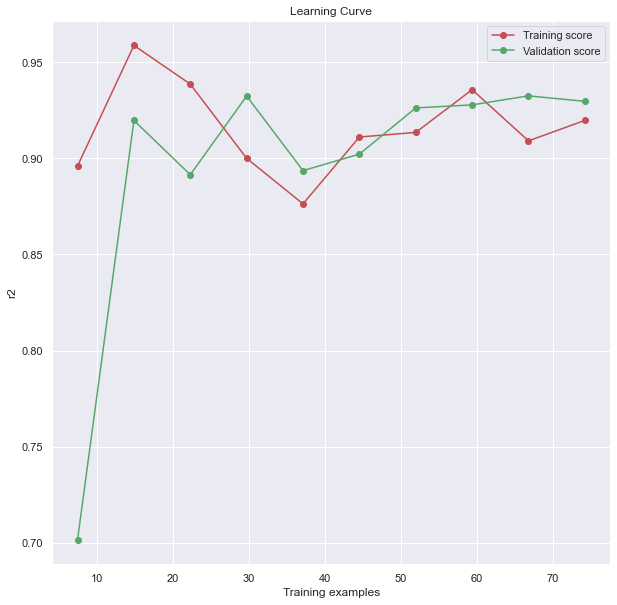

In [51]:
plot_learning_curve(MyPolinomialRegression, search_grid_a[best_score_index_a],
                    X_train_a, y_train_a, X_valid_a, y_valid_a, "r2")

Чим більша вибірка, тим кращі результати.
Для другого набору даних:

In [40]:
scores_b = []
for it, params in enumerate(search_grid_b):
    print(f"{it + 1}. Parameters: {params}")
    est = MyPolinomialRegression(**params)
    est.fit(X_train_b, y_train_b)
    scores_b.append(scoring(y_valid_b.reshape(-1, 1), est.predict(X_valid_b), "mse", verbose=True))
    print()

1. Parameters: {'batch_size': 256, 'c': 0.1, 'degree': 1, 'learning_rate': 0.1}
R2 score: 0.519
MSE score: 0.654
MAE score: 0.562
MAPE score: 0.299

2. Parameters: {'batch_size': 256, 'c': 0.1, 'degree': 1, 'learning_rate': 0.01}
R2 score: 0.531
MSE score: 0.638
MAE score: 0.561
MAPE score: 0.305

3. Parameters: {'batch_size': 256, 'c': 0.1, 'degree': 1, 'learning_rate': 0.001}
R2 score: 0.517
MSE score: 0.656
MAE score: 0.572
MAPE score: 0.313

4. Parameters: {'batch_size': 256, 'c': 0.001, 'degree': 1, 'learning_rate': 0.1}
R2 score: 0.188
MSE score: 1.1
MAE score: 0.559
MAPE score: 0.331

5. Parameters: {'batch_size': 256, 'c': 0.001, 'degree': 1, 'learning_rate': 0.01}
R2 score: 0.599
MSE score: 0.545
MAE score: 0.543
MAPE score: 0.33

6. Parameters: {'batch_size': 256, 'c': 0.001, 'degree': 1, 'learning_rate': 0.001}
R2 score: 0.576
MSE score: 0.576
MAE score: 0.563
MAPE score: 0.343

7. Parameters: {'batch_size': 256, 'c': 1e-06, 'degree': 1, 'learning_rate': 0.1}
R2 score: -0.07

In [41]:
scores_b = np.array(scores_b)
best_score_index_b = np.argmin(scores_b)
print(f"Best model with params: {search_grid_b[best_score_index_b]} with mse: {scores_b[best_score_index_b]:.3},\n(index: {best_score_index_b + 1})")

Best model with params: {'learning_rate': 0.1, 'degree': 1, 'c': 1e-06, 'batch_size': 2048} with mse: 0.544,
(index: 34)


Значення інших метрик для цієї моделі:
* R2 score: 0.6
* MSE score: 0.544
* MAE score: 0.542
* MAPE score: 0.329

Але також є інші параметри, за яких модель гарно працює працює
* {'batch_size': 256, 'c': 0.001, 'degree': 1, 'learning_rate': 0.01}
* {'batch_size': 256, 'c': 1e-06, 'degree': 1, 'learning_rate': 0.01}
* {'batch_size': 512, 'c': 0.001, 'degree': 1, 'learning_rate': 0.01}
* {'batch_size': 512, 'c': 1e-06, 'degree': 1, 'learning_rate': 0.01}
* {'batch_size': 2048, 'c': 0.001, 'degree': 1, 'learning_rate': 0.1}

<module 'matplotlib.pyplot' from '/home/daria/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

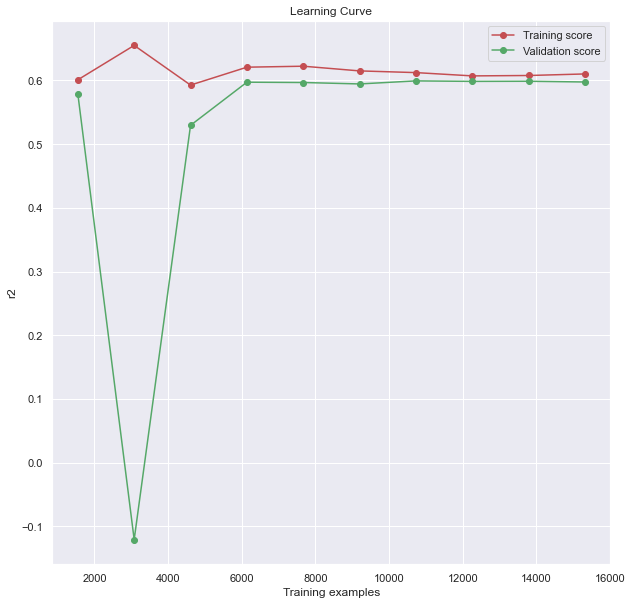

In [47]:
plot_learning_curve(MyPolinomialRegression, search_grid_b[best_score_index_b], X_train_b, y_train_b, 
                    X_valid_b, y_valid_b, "r2")

В цілому, збільшення кількості прикладів за 10 000 не дає покращення результатів.

______________

## Evaluation

In [244]:
best_model_a = MyPolinomialRegression(**search_grid_a[best_score_index_a])
best_model_a.fit(X_train_a, y_train_a)
train_prediction_a = best_model_a.predict(X_train_a)

test_prediction_a = best_model_a.predict(X_test_a)
_ = scoring(y_test_a.reshape(-1,1), test_prediction_a, "r2", verbose=True)

R2 score: 0.931
MSE score: 9.53
MAE score: 2.63
MAPE score: 0.166


In [246]:
_ = scoring(y_train_a.reshape(-1,1), train_prediction_a, "r2", verbose=True)

R2 score: 0.917
MSE score: 10.2
MAE score: 2.5
MAPE score: 0.153


Перенавчання чи недонавчання відсутнє.

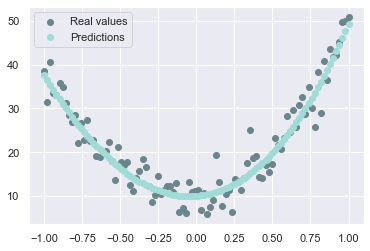

In [235]:
plt.scatter(X_data, y_data, c='#6A858B', label="Real values")
plt.scatter(X_data.reshape(-1, 1), best_model_a.predict(X_data), c='#A0DBD7', label="Predictions")
plt.legend()

In [101]:
random_indx = np.random.choice(15000, size=10000)
best_model_b = MyPolinomialRegression(**search_grid_b[best_score_index_b], verbose=True)
best_model_b.fit(X_train_b[random_indx], y_train_b[random_indx])
test_prediction_b = best_model_b.predict(X_test_b)
_ = scoring(y_test_b.reshape(-1,1), test_prediction_b, "r2", verbose=True)

	MSE: 6.715023933184385
	MSE: 0.5383806475332628
	MSE: 0.5262984976744692
	MSE: 0.5219976964488288
	MSE: 0.5204449127511885
	MSE: 0.5198833241165645
	MSE: 0.5196810257941777
	MSE: 0.5196088427546796
	MSE: 0.5195835404932002
	MSE: 0.5195749576541695
Last checkpoint: /home/daria/Desktop/stu(dying)/uni/6s/NN/lab2/tmp/Model_262.ckpt
Final weights:
 [[ 2.08176255]
 [ 0.80071464]
 [ 0.12908659]
 [-0.17414918]
 [ 0.19155314]
 [-0.00418247]
 [-0.2020593 ]
 [-0.89119325]
 [-0.86379071]]
R2 score: 0.613
MSE score: 0.495
MAE score: 0.508
MAPE score: 0.317


In [103]:
best_model_b = MyPolinomialRegression(**search_grid_b[best_score_index_b], verbose=True)
best_model_b.fit(X_train_b[random_indx], y_train_b[random_indx])
train_prediction_b = best_model_b.predict(X_train_b[random_indx])
_ = scoring(y_train_b[random_indx].reshape(-1,1), train_prediction_b, "r2", verbose=True)

	MSE: 9.840100372031072
	MSE: 0.6034482713312829
	MSE: 0.5332713173890967
	MSE: 0.5221717033043748
	MSE: 0.5201466260321466
	MSE: 0.5197203783053832
	MSE: 0.519614944407748
	MSE: 0.5195848548249593
	MSE: 0.5195754993447093
	MSE: 0.5195725442109272
Last checkpoint: /home/daria/Desktop/stu(dying)/uni/6s/NN/lab2/tmp/Model_264.ckpt
Final weights:
 [[ 2.08177046]
 [ 0.7999445 ]
 [ 0.12895077]
 [-0.17268046]
 [ 0.19029722]
 [-0.00421814]
 [-0.20205924]
 [-0.89294791]
 [-0.86545481]]
R2 score: 0.619
MSE score: 0.52
MAE score: 0.528
MAPE score: 0.314


На тестовому наборі отримали значення мір якості приблизно такі ж, як і на тренувальному, отже недонавчання чи перенавчання відсутнє. Також, якщо звернути увагу на ваги, бачимо, що найсуттєвішою ознакою є середній дохід, наймен важливою - середня кількість жителів в будинку, як і було сказано під час F-тесту (що й очевидно, оскільки він обчислює значимість регресорів саме для лінійної моделі)

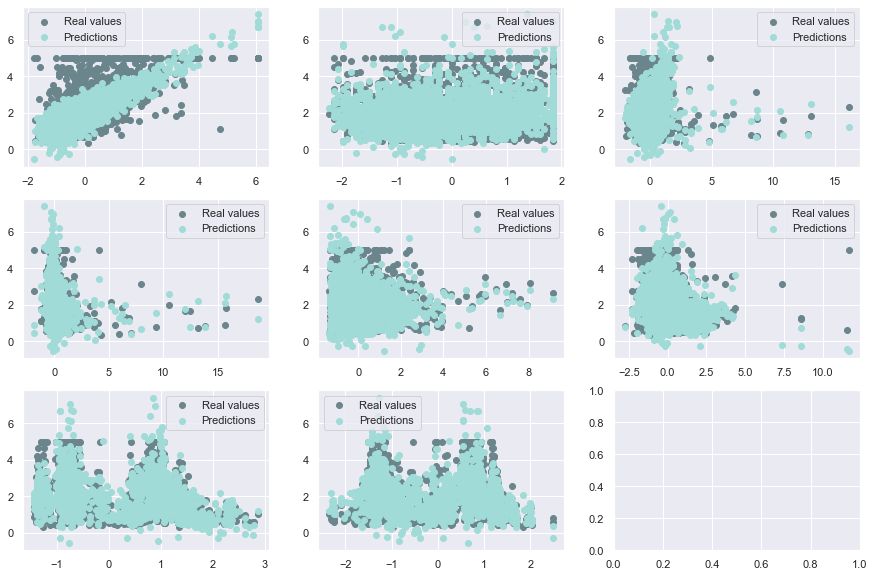

In [58]:
fig,ax = plt.subplots(3,3,figsize=(15,10))
row = col = 0

for i in range(X_b.shape[1]):
    if (i % 3 == 0) & (i > 0):
        row += 1
        col = 0
    ax[row,col].scatter(X_test_b[:, i], y_test_b, c='#6A858B', label="Real values")
    ax[row,col].scatter(X_test_b[:, i], test_prediction_b, c='#A0DBD7', label="Predictions")
    ax[row,col].legend()
    col += 1


На мою думку, модель досить гарно описує дані. Але на цих графіках у очі кидається те, що для справжніх даних верхня границя вартості будинку виглядає дуже штучно, у той час як прогнози мають певний розкид.

<AxesSubplot:>

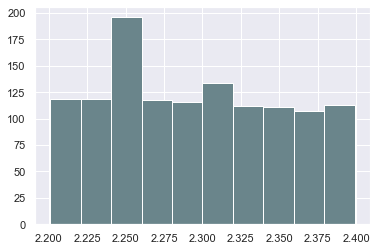

In [233]:
data[(data["MedHouseVal"] > 2.2) & ((data["MedHouseVal"] < 2.4))]["MedHouseVal"].hist(color='#6A858B')

І дійсно, якщо поглянути на майже будь-який інтервал, то дані там розподілені на всьому проміжку.

<AxesSubplot:>

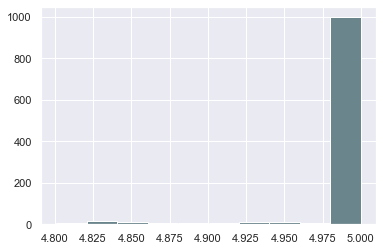

In [234]:
data[(data["MedHouseVal"] >= 4.8)]["MedHouseVal"].hist(color='#6A858B')

Але, якщо звернути увагу на кінець інтервалу спостережень, бачимо, що 965 прикладів набуває саме значення 5.00001, мені це здається дивним у випадку неперервного розподілу. Можливо, таргет для цих спостережень був выдсутній і його штучно зробили рівним цьому значенню, що звичайно буде впливати на якість моделі.

In [137]:
data[data["MedHouseVal"] == 5.00001]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
494,9.3959,52.0,7.512097,0.955645,1366.0,2.754032,37.85,-122.24,5.00001
509,7.8772,52.0,8.282548,1.049861,947.0,2.623269,37.83,-122.23,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


## Висновки
* Для першого набору даних найкраща модель має параметри: {'learning_rate': 0.1, 'degree': 4, 'c': 1e-06, 'batch_size': 2} with mse: 5.17, and R2 score: 0.933, чим більше розмір навчальної вибірки - тим краще
* Для другого набору даних - {'learning_rate': 0.1, 'degree': 1, 'c': 1e-06, 'batch_size': 2048} with mse: 0.544 and R2 score: 0.613, оптимальний розмір навчальної вибірки - 10000, перенавчання чи недонавчання відсутнє
* Також, для другого набору даних виявилася саме звичайна множинна лінійна регресія, і, можливо, якщо зробити певну обробку даних перед навчанням моделі, значення коефіцієнта детермінації буде кращим.

________

### Dealing with outliers
Можливо, наступні дії будуть некоректними для цього набору даних, але все ж спробуємо прибрати викиди, та побудувати модель на чистих даних

Міжквартильний або інтерквартильний розмах — міра розсіяння, що розраховується як різниця між 75-й та 25-й процентилем (це такі значення варіаційного ряду, що 75 та 25 відсотків (процентів) значень варіаційного ряду відповідно приймають значення рівні чи менші за ці значення).       
             
Будемо вважати за викиди будь які значення, які відхиляються від першого квартиля в меншу сторону на 1.5 IQR, і ті, які перевищують третій квартиль більше, ніж на 1.5 IQR.

In [157]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1
data_wo_1 = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

Shape: (16312, 9)


array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

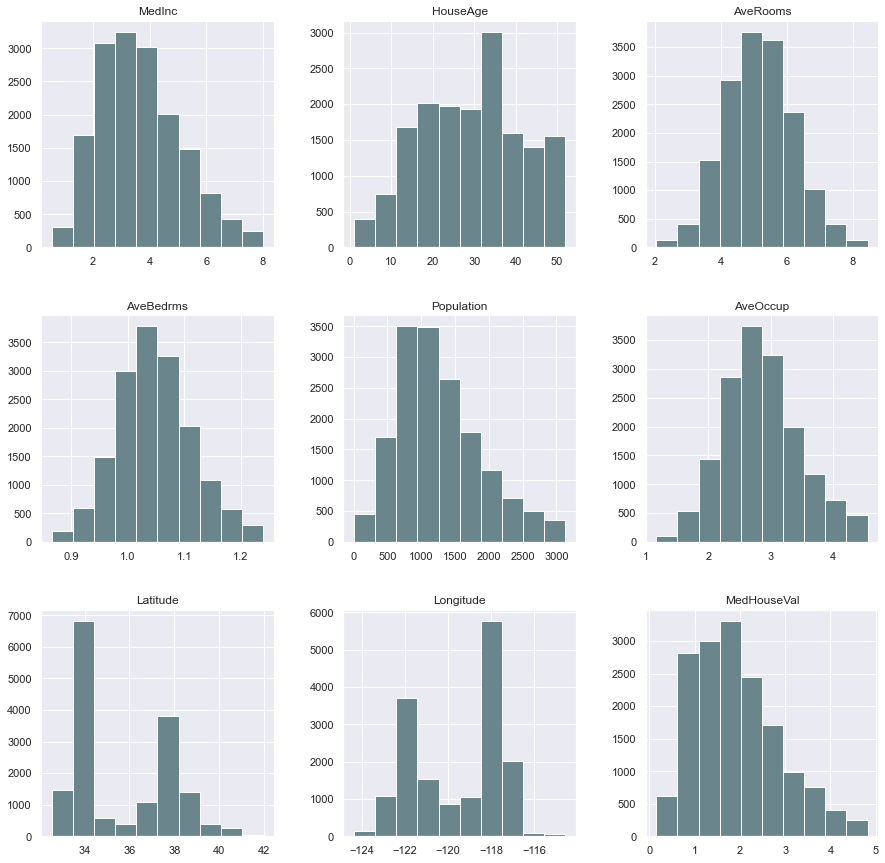

In [232]:
print(f"Shape: {data_wo_1.shape}")
data_wo_1.hist(figsize=(15, 15), color='#6A858B')

Було вилучено близько 4000 прикладів, що, на мою думку, все ж занадто багато.

In [238]:
data_wo_1[data_wo_1["MedHouseVal"] == 5.00001]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


Але спостереження, у яких вартість будинку дорівнювала 5.00001 також були вилучені.

In [228]:
X_b_wo = data_wo_1.drop(["MedHouseVal"], axis=1).to_numpy()
y_b_wo = data_wo_1["MedHouseVal"].to_numpy()

X_train_b_wo, y_train_b_wo, X_valid_b_wo, X_test_b_wo, y_valid_b_wo, y_test_b_wo = train_valid_test_split(X_b_wo, y_b_wo, 0.75, 0.5)

In [229]:
X_train_b_wo = scaler.fit_transform(X_train_b_wo)
X_valid_b_wo = scaler.fit_transform(X_valid_b_wo)
X_test_b_wo = scaler.fit_transform(X_test_b_wo)

In [214]:
scores_wo = []
for it, params in enumerate(search_grid_b):
    print(f"{it + 1}. Parameters: {params}")
    est = MyPolinomialRegression(**params)
    est.fit(X_train_b_wo, y_train_b_wo)
    scores_wo.append(scoring(y_valid_b_wo.reshape(-1, 1), est.predict(X_valid_b_wo), "mse", verbose=True))
    print()

1. Parameters: {'batch_size': 256, 'c': 0.1, 'degree': 1, 'learning_rate': 0.1}
R2 score: 0.578
MSE score: 0.371
MAE score: 0.447
MAPE score: 0.256

2. Parameters: {'batch_size': 256, 'c': 0.1, 'degree': 1, 'learning_rate': 0.01}
R2 score: 0.575
MSE score: 0.373
MAE score: 0.448
MAPE score: 0.256

3. Parameters: {'batch_size': 256, 'c': 0.1, 'degree': 1, 'learning_rate': 0.001}
R2 score: 0.565
MSE score: 0.383
MAE score: 0.455
MAPE score: 0.261

4. Parameters: {'batch_size': 256, 'c': 0.001, 'degree': 1, 'learning_rate': 0.1}
R2 score: 0.643
MSE score: 0.314
MAE score: 0.429
MAPE score: 0.27

5. Parameters: {'batch_size': 256, 'c': 0.001, 'degree': 1, 'learning_rate': 0.01}
R2 score: 0.644
MSE score: 0.313
MAE score: 0.428
MAPE score: 0.27

6. Parameters: {'batch_size': 256, 'c': 0.001, 'degree': 1, 'learning_rate': 0.001}
R2 score: 0.627
MSE score: 0.328
MAE score: 0.437
MAPE score: 0.275

7. Parameters: {'batch_size': 256, 'c': 1e-06, 'degree': 1, 'learning_rate': 0.1}
R2 score: 0.64

In [215]:
scores_wo = np.array(scores_wo)
best_score_index_b_wo = np.argmin(scores_wo)
print(f"Best model with params: {search_grid_b[best_score_index_b_wo]} with mse: {scores_wo[best_score_index_b_wo]:.3},\n(index: {best_score_index_b_wo + 1})")

Best model with params: {'learning_rate': 0.1, 'degree': 1, 'c': 1e-06, 'batch_size': 2048} with mse: 0.313,
(index: 34)


In [230]:
random_indx_ = np.random.choice(12234, size=10000)
params_ = {'learning_rate': 0.1, 'degree': 1, 'c': 1e-06, 'batch_size': 2048}
another_model = MyPolinomialRegression(**params_)
another_model.fit(X_train_b_wo[random_indx_], y_train_b_wo[random_indx_])
another_predictions = another_model.predict(X_test_b_wo)
scoring(y_test_b_wo.reshape(-1,1), another_predictions, "r2", verbose=True)

R2 score: 0.665
MSE score: 0.301
MAE score: 0.416
MAPE score: 0.27


0.6654801884256663

Бачимо, що значення метрик краще, ніж на звичайному наборі.

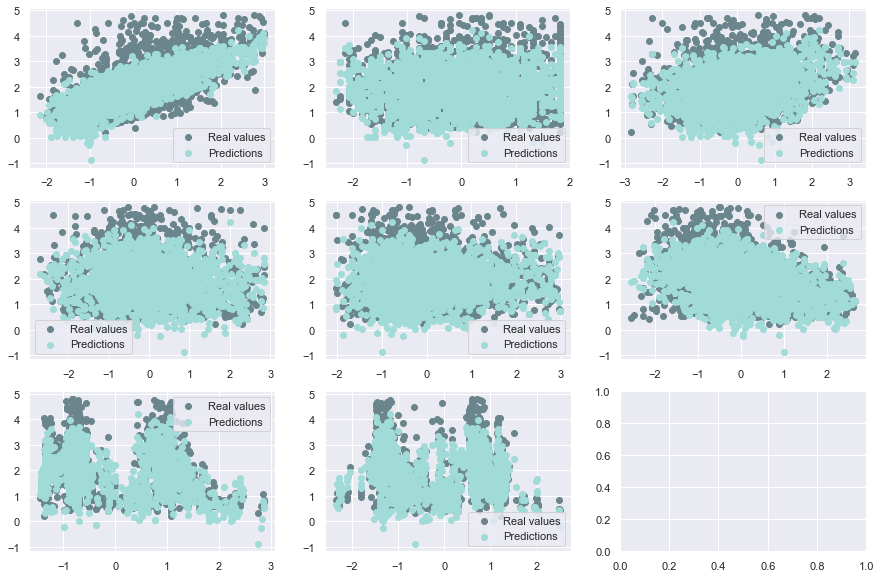

In [231]:
fig,ax = plt.subplots(3,3,figsize=(15,10))
row = col = 0

for i in range(X_b.shape[1]):
    if (i % 3 == 0) & (i > 0):
        row += 1
        col = 0
    ax[row,col].scatter(X_test_b_wo[:, i], y_test_b_wo, c='#6A858B', label="Real values")
    ax[row,col].scatter(X_test_b_wo[:, i], another_predictions, c='#A0DBD7', label="Predictions")
    ax[row,col].legend()
    col += 1
